## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [7]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

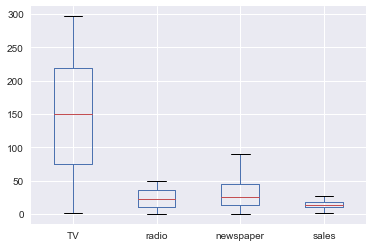

In [8]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263FAD6E710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000263FAF5D400>]], dtype=object)

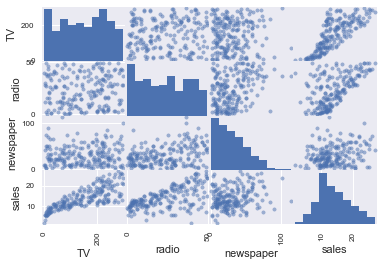

In [9]:
#plt.scatter(Fill_this_in)
%matplotlib inline
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df)

In [10]:
#show correlation values
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Which of the variables seem correlated with one another? Which don't? Explain your answer

As expected, there is little correlation between TV, radio, and newspaper advertising investment. These are the independent variables. Comparing this investment with the dependent variable - sales - we see strong positive correlation between TV advertising and sales. There is a slightly less pronounced positive correlation between radio advertising and sales. Lastly, there is little to no correlation between newspaper advertising and sales. This makes sense because TV is still very much the media zeitgeist. Radio is still prevalent, though significantly less relevant than TV. And newspaper is largely a dying form of media. This data seems to corroborate these claims.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [11]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [12]:
# Code here
y = df['sales']

b) Set X to be just the features described above in df

In [13]:
# Code here
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [14]:
# Code here
from sklearn.model_selection import train_test_split

[Xtrain, Xtest, ytrain, ytest] = train_test_split(X,y,test_size = 0.2)

d) Train model on training data, and make predictions on testing data

In [15]:
# Code here
regr = LinearRegression()
regr.fit(Xtrain,ytrain)

ypred = regr.predict(Xtest)

# Linear Regression coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04523021  0.17655085 -0.00263908]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [16]:
# Code here
import numpy as np
# R^2 is 1 - (SumofSquaresResidual / SumofSquaresTotal)

SSres = np.mean((ypred - ytest) ** 2)
SStot = np.mean((ytest - np.mean(ytest)) ** 2)

R2 = 1 - SSres/SStot

print('R^2: %.2f' % R2)

#I recently learned about the score method in the Linear Regression class, will keep it in mind for the future

R^2: 0.92


This $R^2$ value is fairly close to 1, meaning that our model accounts for most of the variance (92%) present in the data. This is a good thing, because it means our model is fairly reliable, at least according to this set of training/testing data. The model should be applied to numerous test sets to confirm the accuracy of the model.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

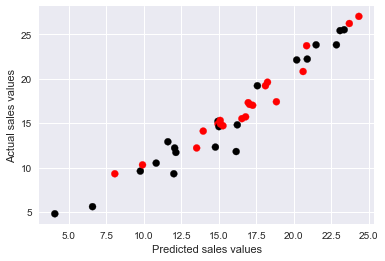

In [17]:
# Code here
plt.scatter(regr.predict(Xtest),ytest,color = ["r","k"])
plt.xlabel('Predicted sales values')
plt.ylabel('Actual sales values')

As shown by the fairly high $R^2$ value calculated in part e, the predicted sales are generally very close to the actual sales. 

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [18]:
# Code/explanation here
# Linear Regression coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04523021  0.17655085 -0.00263908]


The importance of features in this model is characterized by the size of the coefficients which relates the amount spent in advertising in that particular media format to the subsequent sales. However, it is important to check that all variables are normalized prior to making conclusions.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Looking at the coefficient values in g, it would appear that advertising in radio is the best way to improve sales. However, we should have normalized the data to ensure that all of the units are the same. This would lead to TV being the most important advertising method, considering the large quantities of investment in TV ads. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

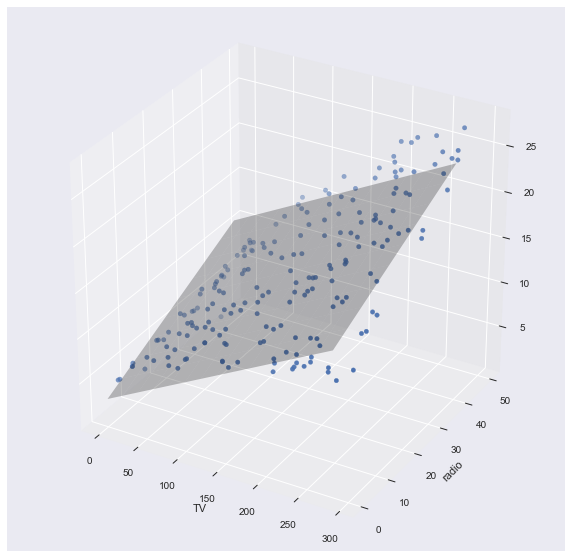

In [52]:
# plotting with  a hyperplane solution
# plot TV and Radio vs. Sales

# setting up axes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

# plot actual data
ax.scatter(df['TV'], df['radio'], df['sales'])
plt.xlabel('TV')
plt.ylabel('radio')

# set up meshgrid for prediction plane plotting
import statsmodels.formula.api as sm
X = np.arange(0,300,20)
Y = np.arange(0,50,5)
X, Y = np.meshgrid(X, Y)

# ordinary least squares model applied to this data set
# I used this blog for reference: https://medium.com/@dhwajraj/python-regression-analysis-part-4-multiple-linear-regression-ed09a0c31c74
model = sm.ols(formula='sales ~ TV + radio', data = df)
results_formula = model.fit()
meshgridinput = pd.core.frame.DataFrame({'TV': X.ravel(), 'radio': Y.ravel()})
fittedZ = results_formula.predict(exog = meshgridinput)
fittedZ = fittedZ.values.reshape(X.shape) #for plotting

# Plot the surface.
surf = ax.plot_surface(X, Y, fittedZ, linewidth=0, color = 'None', alpha = 0.25)


The above hyperplane shows that our data is best suitable for sales predictions at lower levels of investment in TV and radio. Most notably, sales appear higher than expected when investment in both categories is high. A nonlinear model is probably best suited for this data. Based on visual inspection, a piecewise prediction plane may be suitable for when TV sales exceed 200 thousand dollars. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.02949361544713032, m = 1.4700028426067162, error = 112.84803925712856


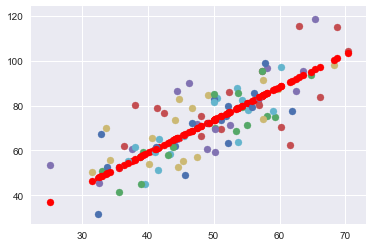

In [58]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100,0.00001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


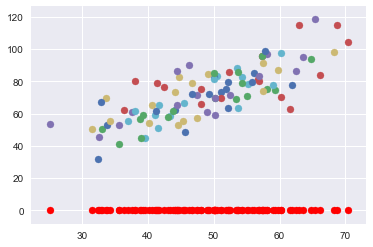

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


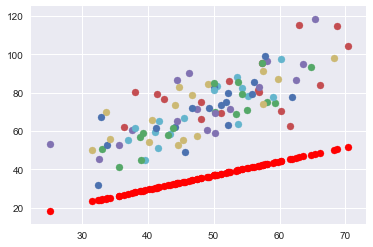

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


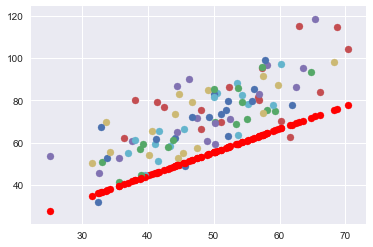

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


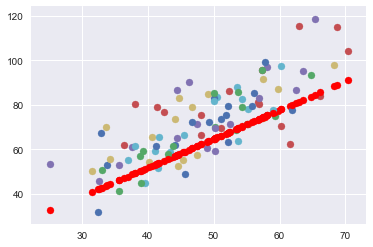

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


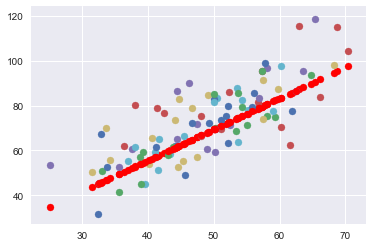

In [64]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,5):
    run(num,0.0001)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.0, m = 0.0, error = 5565.107834483211


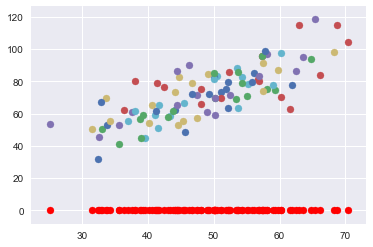

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


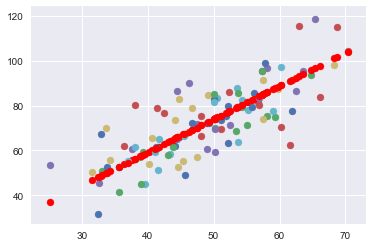

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.030269551391295814, m = 1.478897166581077, error = 112.64994425659279


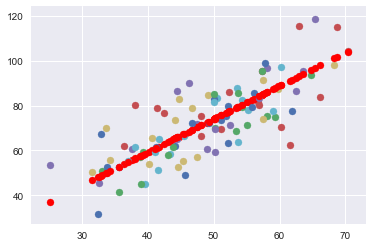

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.030844644896744662, m = 1.4775751244025332, error = 112.65386267042132


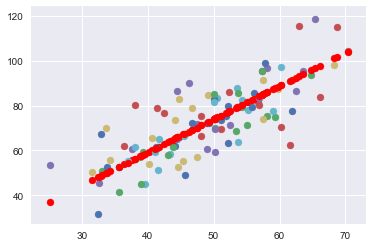

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.004227923197466066, m = 0.09277834791759343, error = 4902.131329965742


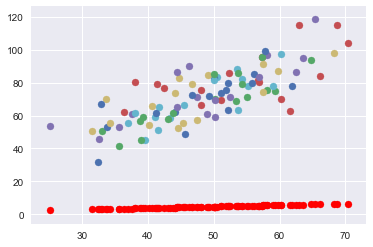

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -1.556023597665339, m = -79.3209440373159, error = 16275190.301098265


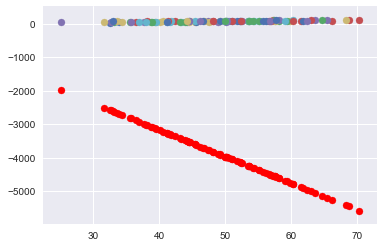

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -28.321332996923207, m = -1441.1283864935208, error = 5187984356.333075


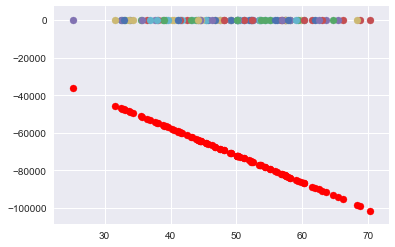

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -264.8924909231912, m = -13477.527582189403, error = 452916555876.42444


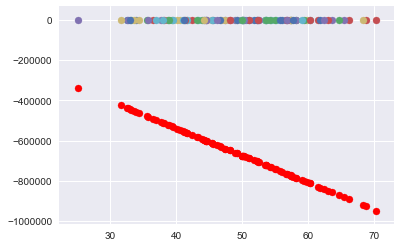

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -1643.8690379251402, m = -83637.71709467887, error = 17439022326762.51


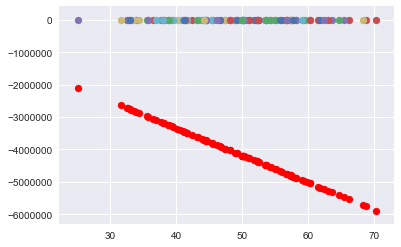

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -7691.535829748162, m = -391333.52701501845, error = 381768272050979.6


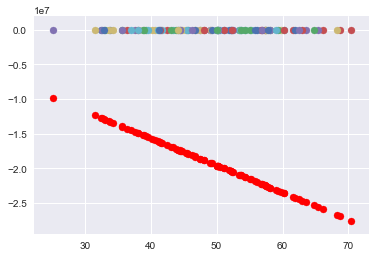

In [63]:

for num in range(0,10):
    run(10,num*0.0001)
    plt.show()


The two cells above show how learning rate and number of iterations affect our model's convergence with the data. We see that with a reasonable learning rate (0.0001), the error rate of convergence decreases with the number of iterations. The next cell shows that when the learning rate gets too large (0.0004), the model begins to diverge after 10 iterations. Once it gets any larger, the model diverges entirely. The next part of this problem will examine the exact relationship between number of iterations, learning rate, error rate, and convergence.

## Problem 3 Part 2

[1e-05, 0.0001, 0.0004]
[2073.9375301330579, 112.65585181499746, 4902.1313299657422]


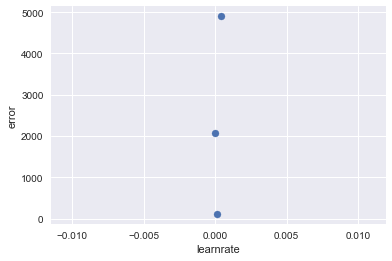

In [120]:
points = genfromtxt("../data/data.csv", delimiter=",")

def myerrorplotter(numit,lrvals):
    #store error vals
    error = []
    num_iterations = numit
    for learnrate in lrvals:
        learning_rate = learnrate
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        error.append(compute_error_for_line_given_points(b, m, points))
        
    return error 

#learnrate selected by observing data
lrvals = [0.00001,0.0001,0.0004]

error = myerrorplotter(10,lrvals)

import matplotlib.pyplot as plt
plt.scatter(lrvals,error)
print(lrvals)
print(error)
plt.xlabel('learnrate')
plt.ylabel('error')


[1e-05, 0.0001, 0.0004, 0.0005]
[2073.9375301330579, 112.65585181499746, 4902.1313299657422, 16275190.301098265]


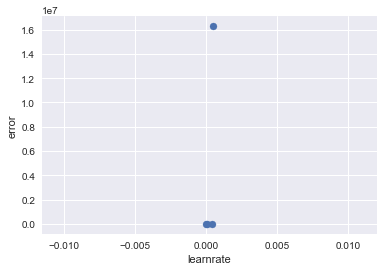

In [121]:
#learnrate selected by observing data
lrvals = [0.00001,0.0001,0.0004,0.0005]

error = myerrorplotter(10,lrvals)

import matplotlib.pyplot as plt
plt.scatter(lrvals,error)
print(lrvals)
print(error)
plt.xlabel('learnrate')
plt.ylabel('error')

[1e-05, 0.0001, 0.0004]
[112.84803925712856, 112.64705664288809, 1603.9025064985485]


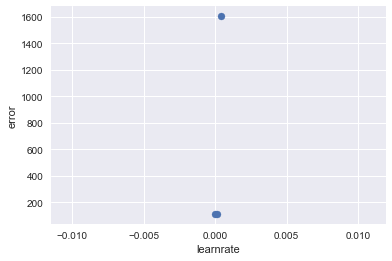

In [122]:
#learnrate selected by observing data
lrvals = [0.00001,0.0001,0.0004]

error = myerrorplotter(100,lrvals)

import matplotlib.pyplot as plt
plt.scatter(lrvals,error)
print(lrvals)
print(error)
plt.xlabel('learnrate')
plt.ylabel('error')

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

These plots above show that a low learning rate (about 0.0001) and number of iterations on the order of 10 iterations lead to the lowest error rates and fastest convergence. When the learning rate is too low, the prediction converges a bit slower than normal. Also, these plots show that there is a clear cutoff learning rate around 0.0004 where convergence no longer occurs and the prediction diverges.